In [1]:
!pip install umap-learn

In [2]:
!pip install -U sentence-transformers

## **1. Chargement des données et des library**

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
import numpy as np

In [4]:
# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

## **2. focntion dimred UMAP**

In [5]:
import umap
def dim_red(embedding, p):
    umap_model =umap.UMAP()  # Use umap.UMAP to create an instance of the UMAP class
    reduced_embeddings = umap_model.fit_transform(embedding)
    return reduced_embeddings


In [7]:
umap_dim_red = dim_red(embeddings, 20)

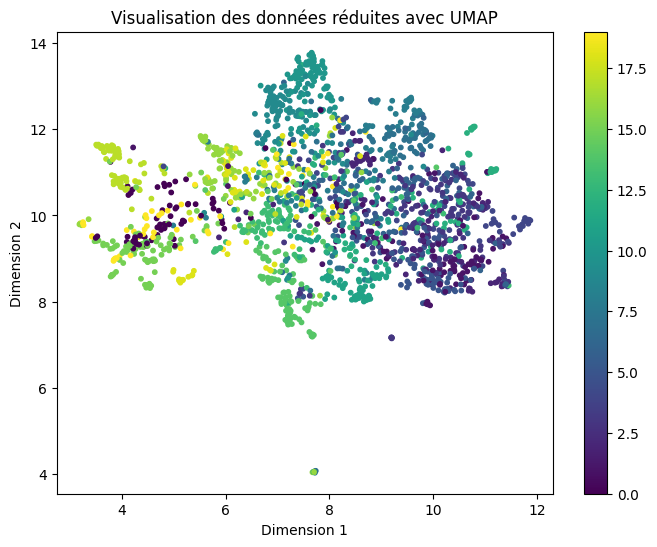

In [8]:
import matplotlib.pyplot as plt

# Supposons que reduced_embeddings et labels sont vos données réduites et étiquettes respectivement

# Création du scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(umap_dim_red[:, 0], umap_dim_red[:, 1], c=labels, cmap='viridis', s=10)  # Remplacez les index 0 et 1 selon le nombre de dimensions réduites
plt.colorbar()  # Ajout d'une barre de couleur pour les étiquettes
plt.title('Visualisation des données réduites avec UMAP')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()